In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
file_path = '/content/customer_support_tickets.csv'
df = pd.read_csv(file_path)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8469 entries, 0 to 8468
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ticket ID                     8469 non-null   int64  
 1   Customer Name                 8469 non-null   object 
 2   Customer Email                8469 non-null   object 
 3   Customer Age                  8469 non-null   int64  
 4   Customer Gender               8469 non-null   object 
 5   Product Purchased             8469 non-null   object 
 6   Date of Purchase              8469 non-null   object 
 7   Ticket Type                   8469 non-null   object 
 8   Ticket Subject                8469 non-null   object 
 9   Ticket Description            8469 non-null   object 
 10  Ticket Status                 8469 non-null   object 
 11  Resolution                    2769 non-null   object 
 12  Ticket Priority               8469 non-null   object 
 13  Tic

In [8]:
df.isnull().sum()

,0
Ticket ID,0
Customer Name,0
Customer Email,0
Customer Age,0
Customer Gender,0
Product Purchased,0
Date of Purchase,0
Ticket Type,0
Ticket Subject,0
Ticket Description,0


In [9]:
df.describe(include='all')

,Ticket ID,Customer Name,Customer Email,Customer Age,Customer Gender,Product Purchased,Date of Purchase,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Resolution,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution,Customer Satisfaction Rating
count,8469.000000,8469,8469,8469.000000,8469,8469,8469,8469,8469,8469,8469,2769,8469,8469,5650,2769,2769.000000
unique,NaN,8028,8320,NaN,3,42,730,5,16,8077,3,2769,4,4,5470,2728,NaN
top,NaN,Michael Garcia,bsmith@example.com,NaN,Male,Canon EOS,2020-10-21,Refund request,Refund request,I'm having an issue with the {product_purchase...,Pending Customer Response,Case maybe show recently my computer follow.,Medium,Email,2023-06-01 15:21:42,2023-06-01 17:14:42,NaN
freq,NaN,5,4,NaN,2896,240,24,1752,576,25,2881,1,2192,2143,3,3,NaN
mean,4235.000000,NaN,NaN,44.026804,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.991333
std,2444.934048,NaN,NaN,15.296112,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.407016
min,1.000000,NaN,NaN,18.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000
25%,2118.000000,NaN,NaN,31.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000
50%,4235.000000,NaN,NaN,44.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.000000
75%,6352.000000,NaN,NaN,57.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.000000


In [10]:
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

In [11]:
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].mean())
df[categorical_cols] = df[categorical_cols].fillna(df[categorical_cols].mode().iloc[0])

In [12]:
df.drop_duplicates(inplace=True)

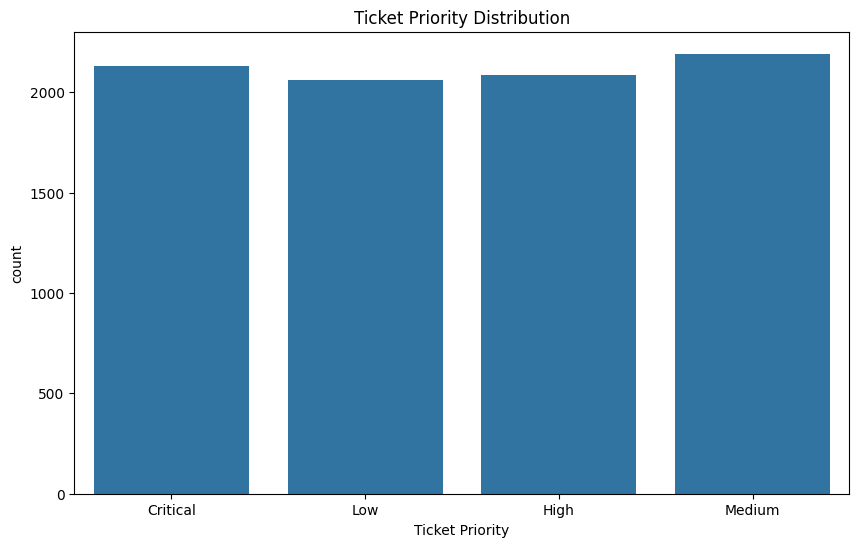

In [13]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Ticket Priority')
plt.title('Ticket Priority Distribution')
plt.show()


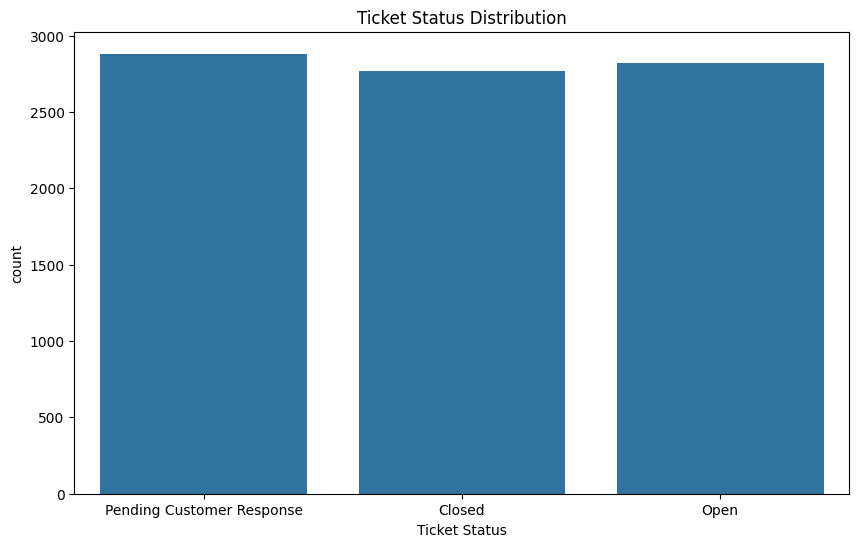

In [14]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Ticket Status')
plt.title('Ticket Status Distribution')
plt.show()

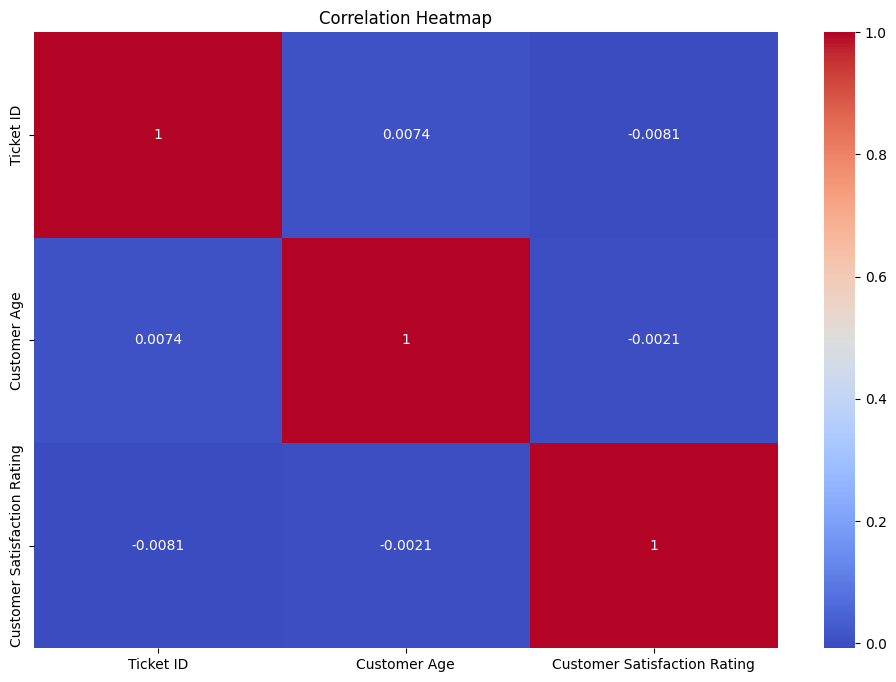

In [16]:
numerical_df = df.select_dtypes(include=['number'])

plt.figure(figsize=(12, 8))
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

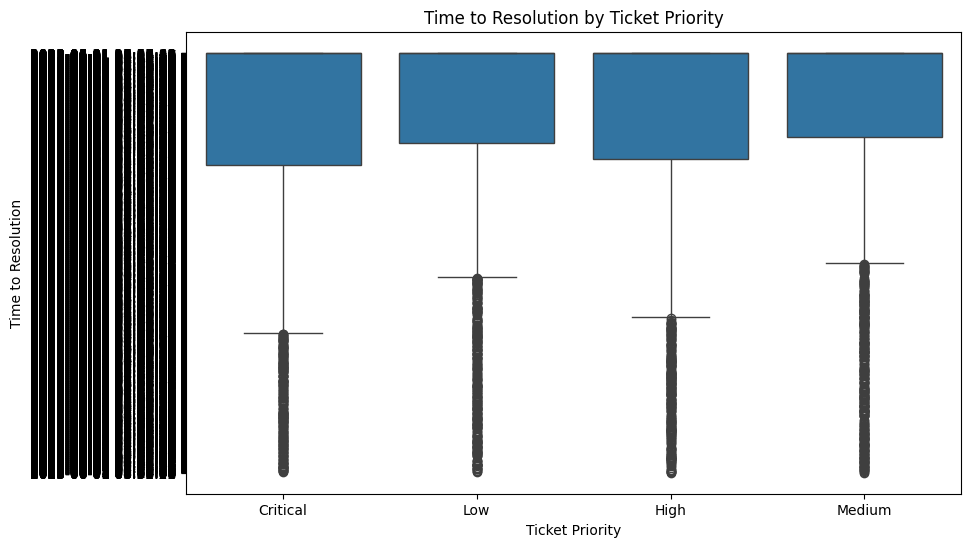

In [17]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Ticket Priority', y='Time to Resolution', data=df)
plt.title('Time to Resolution by Ticket Priority')
plt.show()

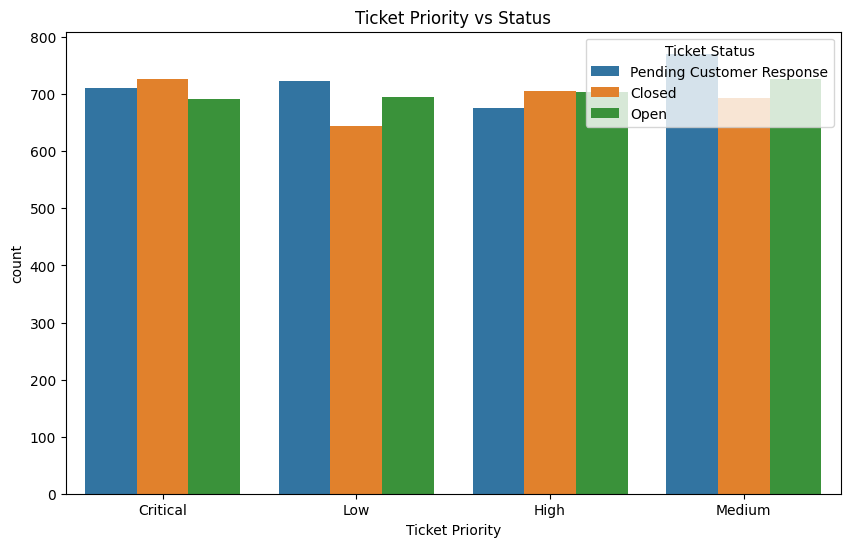

In [25]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Ticket Priority', hue='Ticket Status', data=df)
plt.title('Ticket Priority vs Status')
plt.show()


More analysis

In [31]:
df['First Response Time'] = pd.to_datetime(df['First Response Time'], errors='coerce')
df['Time to Resolution'] = pd.to_datetime(df['Time to Resolution'], errors='coerce')
df['Customer Satisfaction Rating'] = pd.to_numeric(df['Customer Satisfaction Rating'], errors='coerce')

<ipython-input-32-8ab017abbe77>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=status_counts.index, y=status_counts.values, palette='viridis')


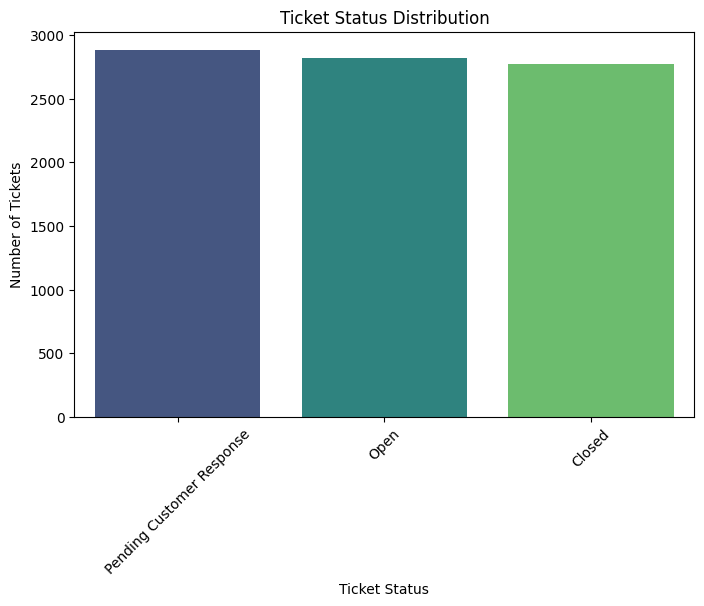

In [32]:
status_counts = df['Ticket Status'].value_counts()
plt.figure(figsize=(8, 5))
sns.barplot(x=status_counts.index, y=status_counts.values, palette='viridis')
plt.title('Ticket Status Distribution')
plt.xlabel('Ticket Status')
plt.ylabel('Number of Tickets')
plt.xticks(rotation=45)
plt.show()

<ipython-input-33-ed98059e6266>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ticket_type_counts.index, y=ticket_type_counts.values, palette='magma')


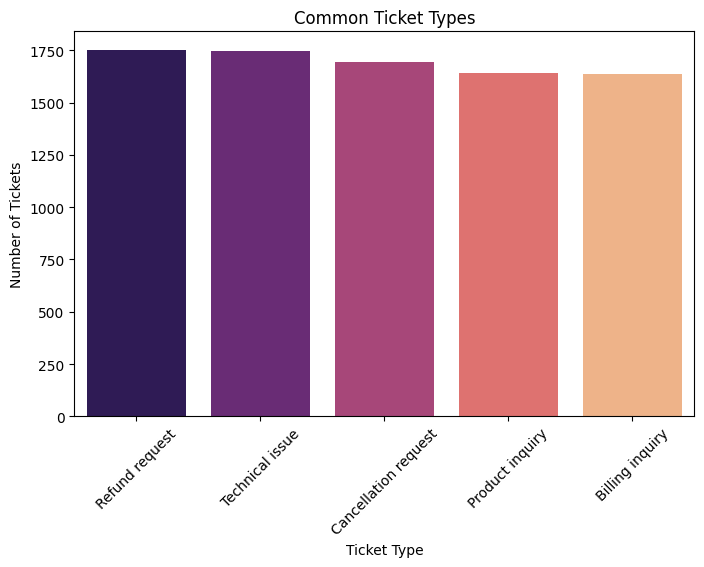

In [33]:
ticket_type_counts = df['Ticket Type'].value_counts()
plt.figure(figsize=(8, 5))
sns.barplot(x=ticket_type_counts.index, y=ticket_type_counts.values, palette='magma')
plt.title('Common Ticket Types')
plt.xlabel('Ticket Type')
plt.ylabel('Number of Tickets')
plt.xticks(rotation=45)
plt.show()

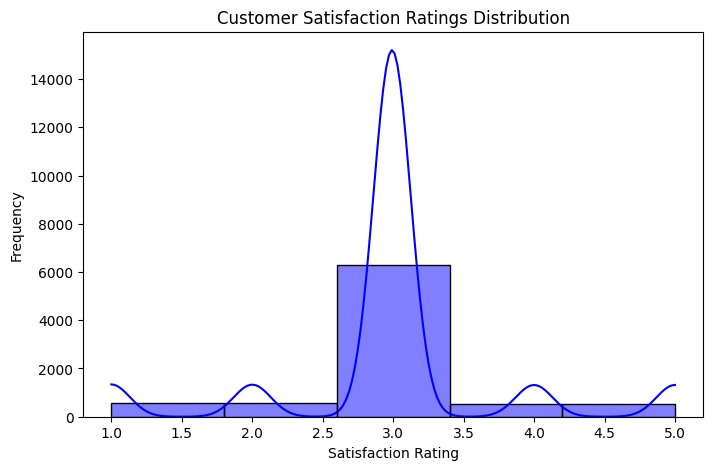

In [35]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Customer Satisfaction Rating'], bins=5, kde=True, color='blue')
plt.title('Customer Satisfaction Ratings Distribution')
plt.xlabel('Satisfaction Rating')
plt.ylabel('Frequency')
plt.show()

<ipython-input-39-9dd616b3a4b4>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Ticket Status', y='Response Time', data=avg_response_time, palette='coolwarm')


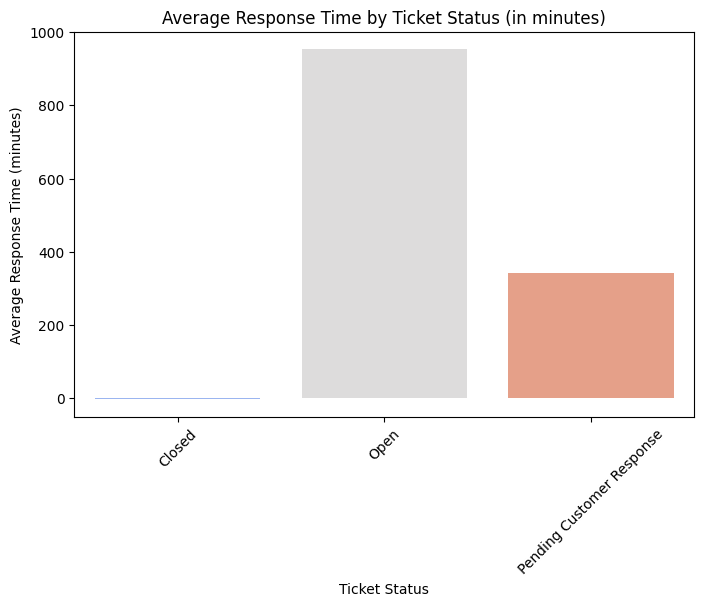

In [39]:
df['Response Time'] = (df['Time to Resolution'] - df['First Response Time']).dt.total_seconds() / 60  # Convert to minutes
avg_response_time = df.groupby('Ticket Status')['Response Time'].mean().reset_index()
plt.figure(figsize=(8, 5))
sns.barplot(x='Ticket Status', y='Response Time', data=avg_response_time, palette='coolwarm')
plt.title('Average Response Time by Ticket Status (in minutes)')
plt.xlabel('Ticket Status')
plt.ylabel('Average Response Time (minutes)')
plt.xticks(rotation=45)
plt.show()



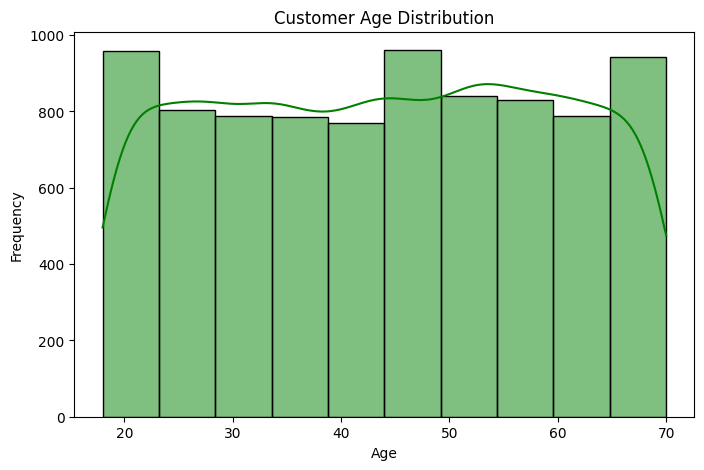

In [41]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Customer Age'], bins=10, kde=True, color='green')
plt.title('Customer Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


<ipython-input-42-a156b84ef0b8>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=product_issue_counts.index, y=product_issue_counts.values, palette='rocket')


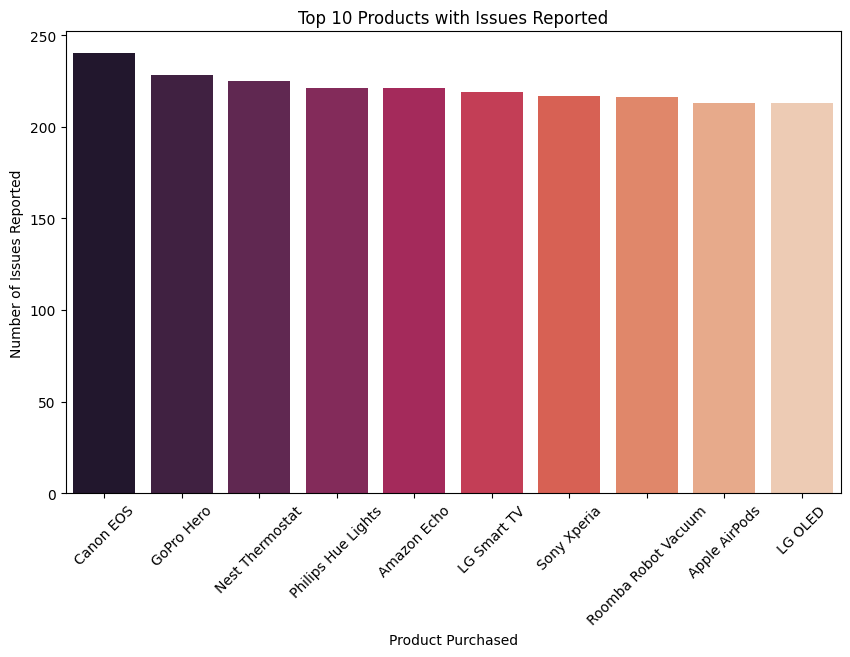

In [42]:
product_issue_counts = df['Product Purchased'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=product_issue_counts.index, y=product_issue_counts.values, palette='rocket')
plt.title('Top 10 Products with Issues Reported')
plt.xlabel('Product Purchased')
plt.ylabel('Number of Issues Reported')
plt.xticks(rotation=45)
plt.show()